<a href="https://colab.research.google.com/github/georgsmeinung/rn1-perceptron/blob/main/RN-Clase01/RN-C1-Perceptr%C3%B3n%20-%20Actividad%20Complementaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Perceptrón - Actividad Complementaria**

El archivo **semillas.csv** contiene información de granos que pertenecen a tres variedades diferentes de trigo: Kama, Rosa y Canadiense.

A partir de los 210 ejemplos de este archivo, luego de normalizarlos utilizando los valores de media y desvío, se logró entrenar un perceptrón capaz de identificar, con una precisión del 100%, uno de los tres tipos de semillas. Para realizar el entrenamiento se utilizó una velocidad de aprendizaje de 0.05 y un máximo de 200 iteraciones. Indique cuál es el tipo de semilla que puede ser reconocido correctamente por un perceptrón.

# Task
Train a perceptron model on the "semillas.csv" dataset to classify seed types. Normalize the data, use a learning rate of 0.05 and a maximum of 200 iterations. Identify which seed type can be recognized with 100% accuracy.

## Load data

### Subtask:
Load the `semillas.csv` dataset into a pandas DataFrame.


In [2]:
import os
print(os.listdir('/content/drive/MyDrive/Colab Notebooks/DATOS'))

['drugs_train.csv', 'FrutasTest.csv', 'semillas.csv', 'automobile-simple.csv', 'drugs_test.csv', 'FrutasTrain.csv', 'Sonar.csv', 'zoo.csv']


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATOS/semillas.csv')

# Display the first few rows of the dataframe
display(df.head())

,Area,Perimetro,Compacidad,LongNucleo,AnchoNucleo,Asimetria,LongSurco,Clase
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Tipo1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Tipo1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Tipo1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Tipo1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Tipo1


## Prepare and normalize dataset

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Separate features (X) and target variable (y)
X = df.drop('Clase', axis=1)
y = df['Clase']

# Since a perceptron is a binary classifier, we need to train one perceptron for each class.
# Let's start by creating a binary target for 'Tipo1' vs others.
y_binary_tipo1 = np.where(y == 'Tipo1', 1, 0)

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the shapes of the preprocessed data
print("Shape of features (X_scaled):", X_scaled.shape)
print("Shape of target (y_binary_tipo1):", y_binary_tipo1.shape)

# Display the first few rows of the dataframe
display(X_scaled)

Shape of features (X_scaled): (210, 7)
Shape of target (y_binary_tipo1): (210,)


array([[ 1.42097769e-01,  2.15462437e-01,  6.06017918e-05, ...,
         1.41701823e-01, -9.86151745e-01, -3.83577423e-01],
       [ 1.11880257e-02,  8.22375713e-03,  4.28515270e-01, ...,
         1.97432229e-01, -1.78816620e+00, -9.22013487e-01],
       [-1.92066576e-01, -3.60200562e-01,  1.44238325e+00, ...,
         2.08047544e-01, -6.67479334e-01, -1.18919199e+00],
       ...,
       [-5.67570840e-01, -6.90247348e-01,  7.33948301e-01, ...,
        -7.06044846e-02,  3.07658816e+00, -7.18060432e-01],
       [-1.03608992e+00, -1.03564515e+00, -8.01701104e-01, ...,
        -1.12152071e+00, -6.81351965e-02, -7.42534799e-01],
       [-8.77620233e-01, -9.35863561e-01, -1.10234659e-01, ...,
        -7.55292327e-01,  1.29122264e+00, -7.03783718e-01]])

## Train an test perceptron

In [5]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import numpy as np

# Get unique classes
unique_classes = df['Clase'].unique()

# Iterate through each class
for class_name in unique_classes:
    print(f"Training Perceptron for class: {class_name}")

    # Create binary target for the current class
    y_binary = np.where(y == class_name, 1, 0)

    # Initialize and train the Perceptron model
    perceptron = Perceptron(eta0=0.05, max_iter=200, random_state=42)
    perceptron.fit(X_scaled, y_binary)

    # Predict on the training data
    y_pred = perceptron.predict(X_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_binary, y_pred)

    print(f"Accuracy for {class_name} classification: {accuracy:.4f}")
    print("-" * 30)

Training Perceptron for class: Tipo1
Accuracy for Tipo1 classification: 0.9238
------------------------------
Training Perceptron for class: Tipo2
Accuracy for Tipo2 classification: 0.9905
------------------------------
Training Perceptron for class: Tipo3
Accuracy for Tipo3 classification: 0.9667
------------------------------


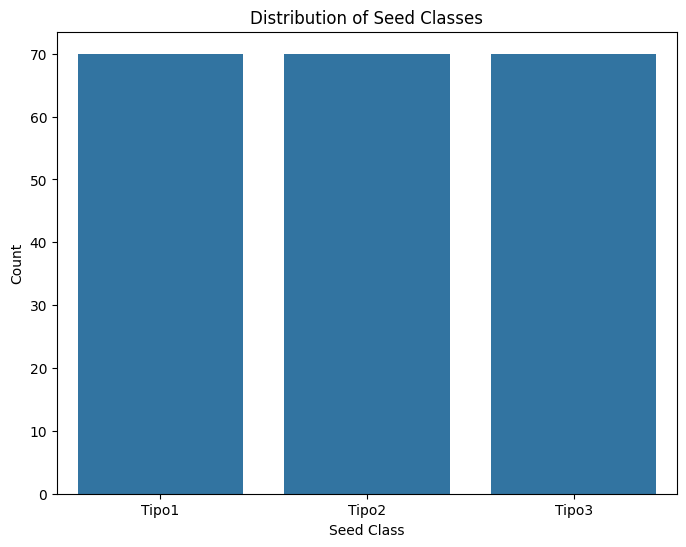

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the counts of each class
class_counts = df['Clase'].value_counts()

# Create a bar plot of the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribution of Seed Classes')
plt.xlabel('Seed Class')
plt.ylabel('Count')
plt.show()